In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('ds_salaries.csv')

In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [8]:
df.shape

(3755, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [11]:
df.isnull() #eksik verilere bakıyoruz

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3750,False,False,False,False,False,False,False,False,False,False,False
3751,False,False,False,False,False,False,False,False,False,False,False
3752,False,False,False,False,False,False,False,False,False,False,False
3753,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum() # datasetimiz eksik veri içermiyor çıktı 0

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [16]:
df.nunique() # sütunlardaki benzersiz değerlerin kaç tane olduğunu gösteriyor

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [22]:
df["work_year"].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

İLK 10 MESLEK


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiğin görünümü ve boyutunu ayarlamak için oluşturuldu
sns.set_theme()
sns.set(rc={"figure.figsize":(10,6), "figure.dpi":300})

In [30]:
# 2023 De en çok tercih eidlen 10 mesleği buluyoruz
jobs = df[df["work_year"] == 2023]["job_title"].value_counts().nlargest(10).reset_index()
jobs

,index,job_title
0,Data Engineer,499
1,Data Scientist,370
2,Data Analyst,307
3,Machine Learning Engineer,158
4,Research Scientist,55
5,Data Architect,52
6,Analytics Engineer,46
7,Applied Scientist,40
8,Research Engineer,32
9,Data Manager,22


[Text(2, 0, '499'),
 Text(2, 0, '370'),
 Text(2, 0, '307'),
 Text(2, 0, '158'),
 Text(2, 0, '55'),
 Text(2, 0, '52'),
 Text(2, 0, '46'),
 Text(2, 0, '40'),
 Text(2, 0, '32'),
 Text(2, 0, '22')]

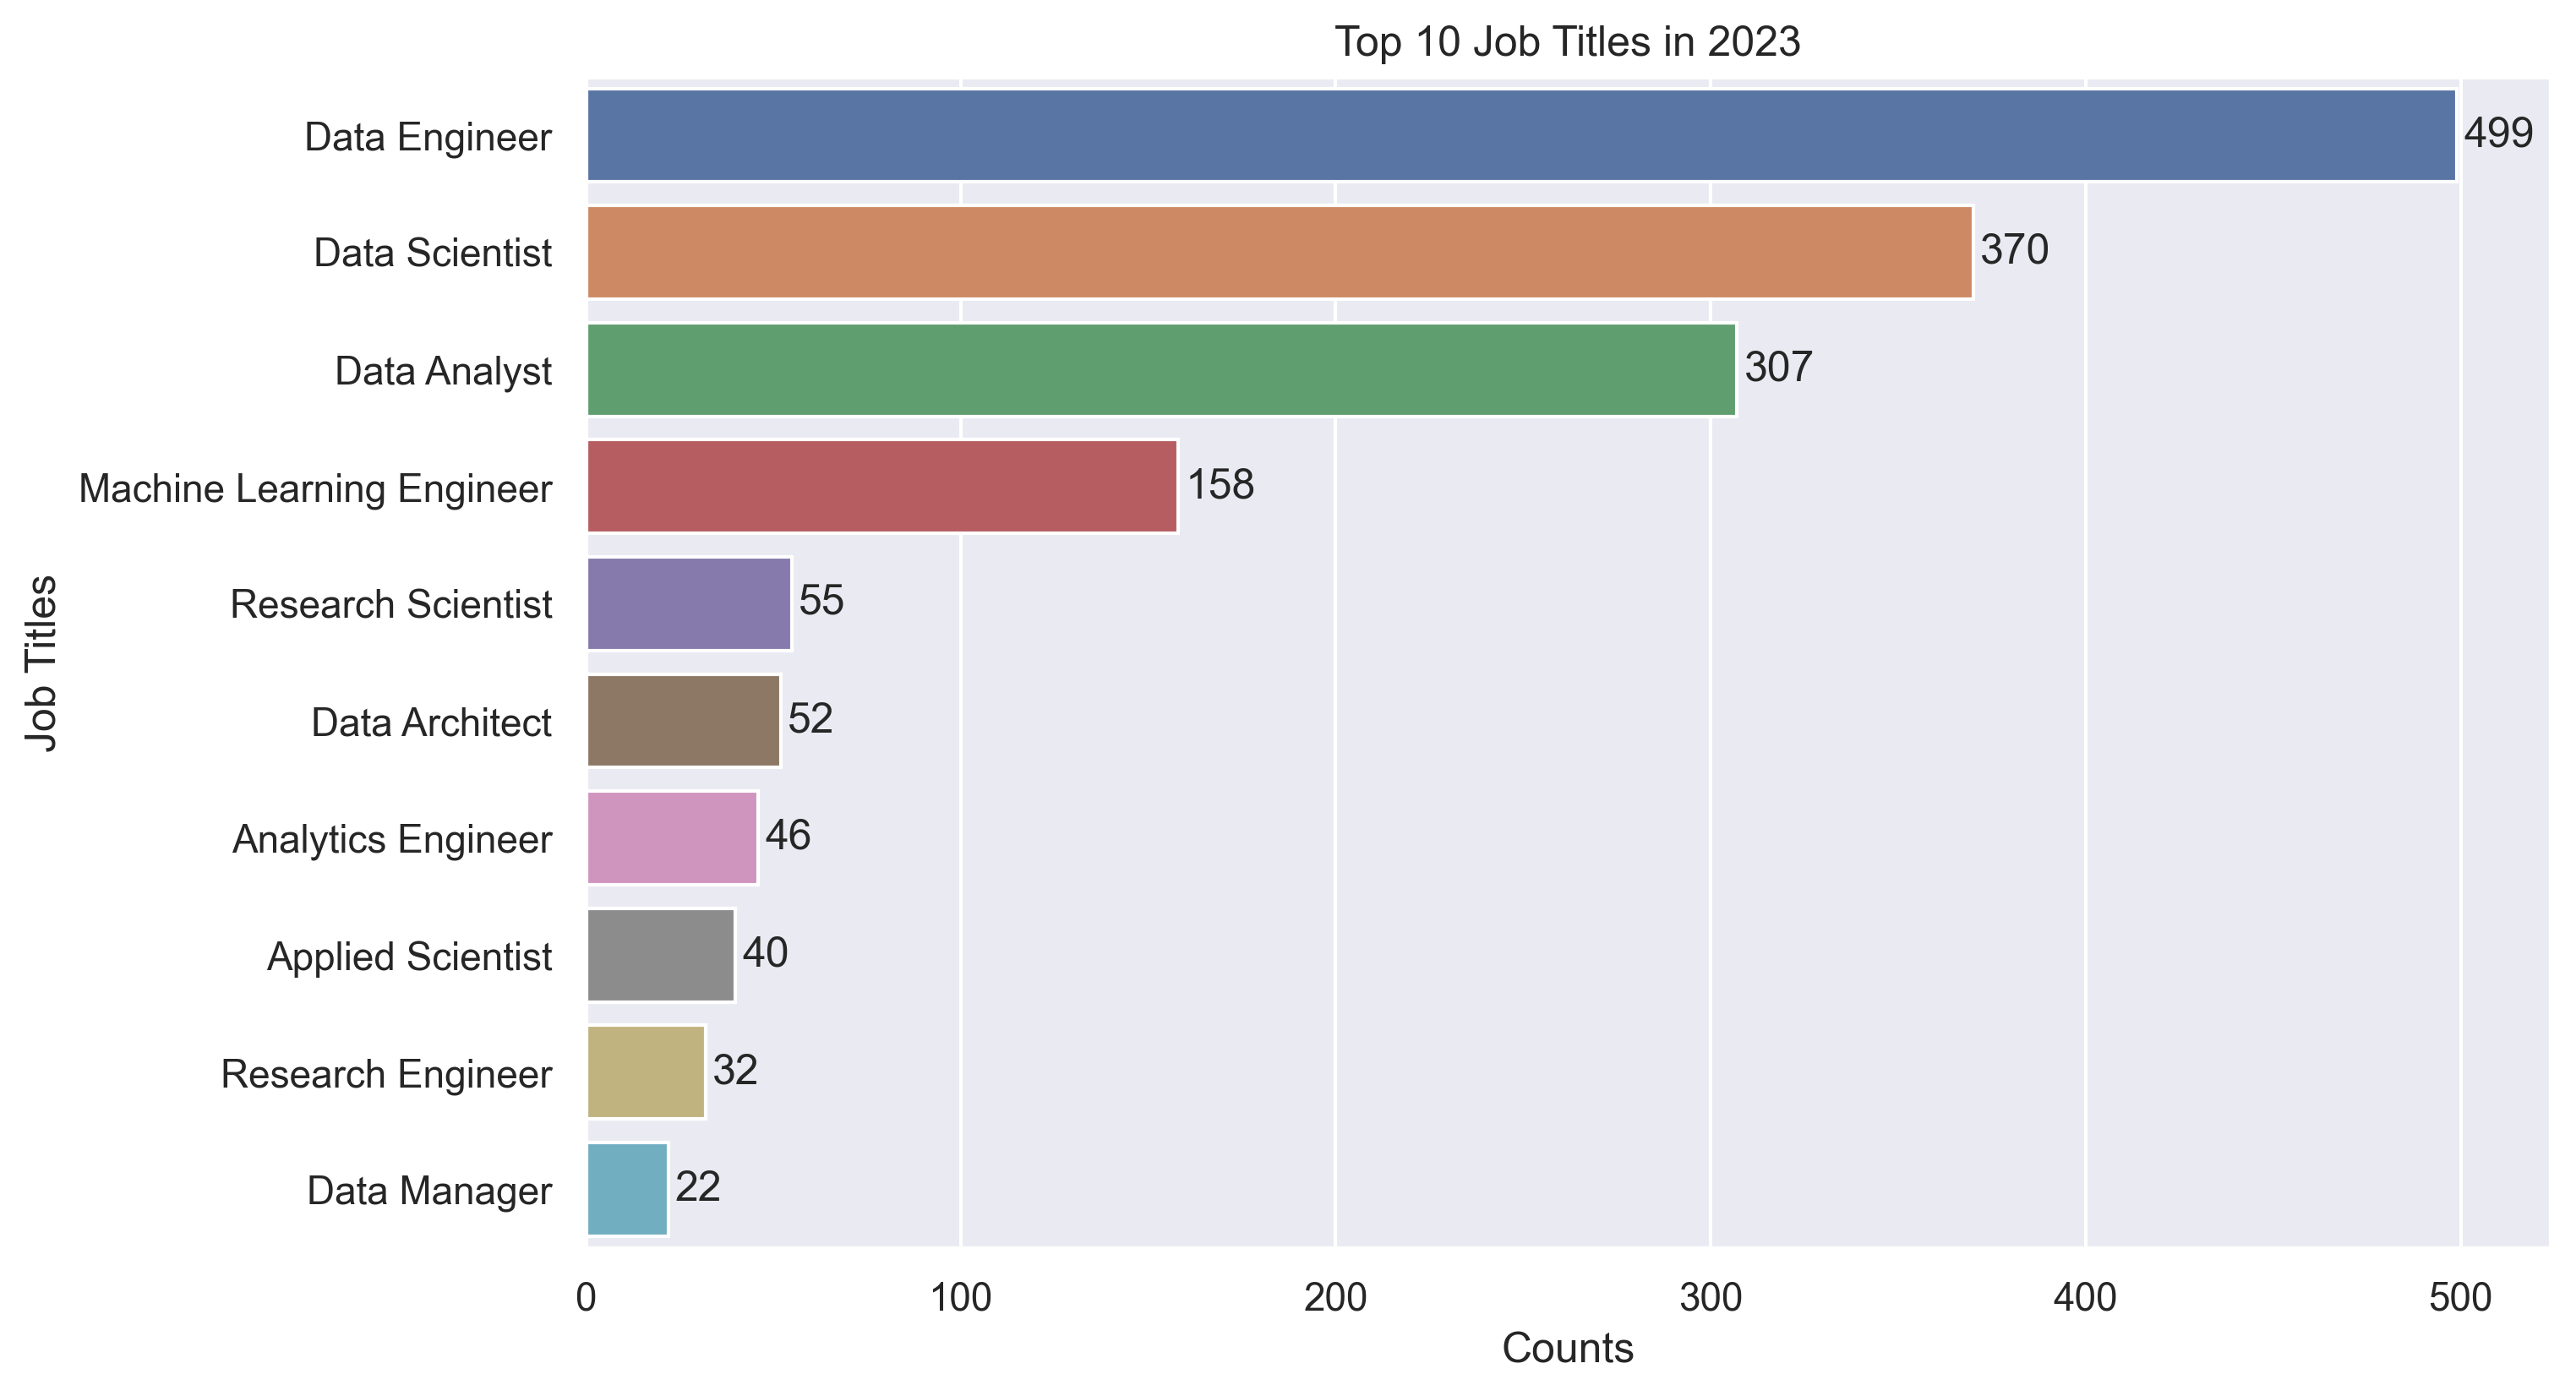

In [31]:
# 2023 De en çok tercih eidlen 10 mesleği grafiğe döküyoruz
fig, ax = plt.subplots()
ax = sns.barplot(ax=ax, data=df, y=jobs["index"], x=jobs.job_title)
ax.set(ylabel="Job Titles", xlabel="Counts", title="Top 10 Job Titles in 2023")
ax.bar_label(ax.containers[0], padding=2)


DENEYİM DÜZEYLERİ

In [38]:
df["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [47]:
# Kısaltma olan uzmanlık seviyelerini yeniden adlandırdık
df["experience_level"] = df["experience_level"].replace("EN","Junior")
df["experience_level"] = df["experience_level"].replace("MI","Mid-Level")
df["experience_level"] = df["experience_level"].replace("SE","Senior")
df["experience_level"] = df["experience_level"].replace("EX","Director")

[Text(0, 0, '2516'), Text(0, 0, '805'), Text(0, 0, '320'), Text(0, 0, '114')]

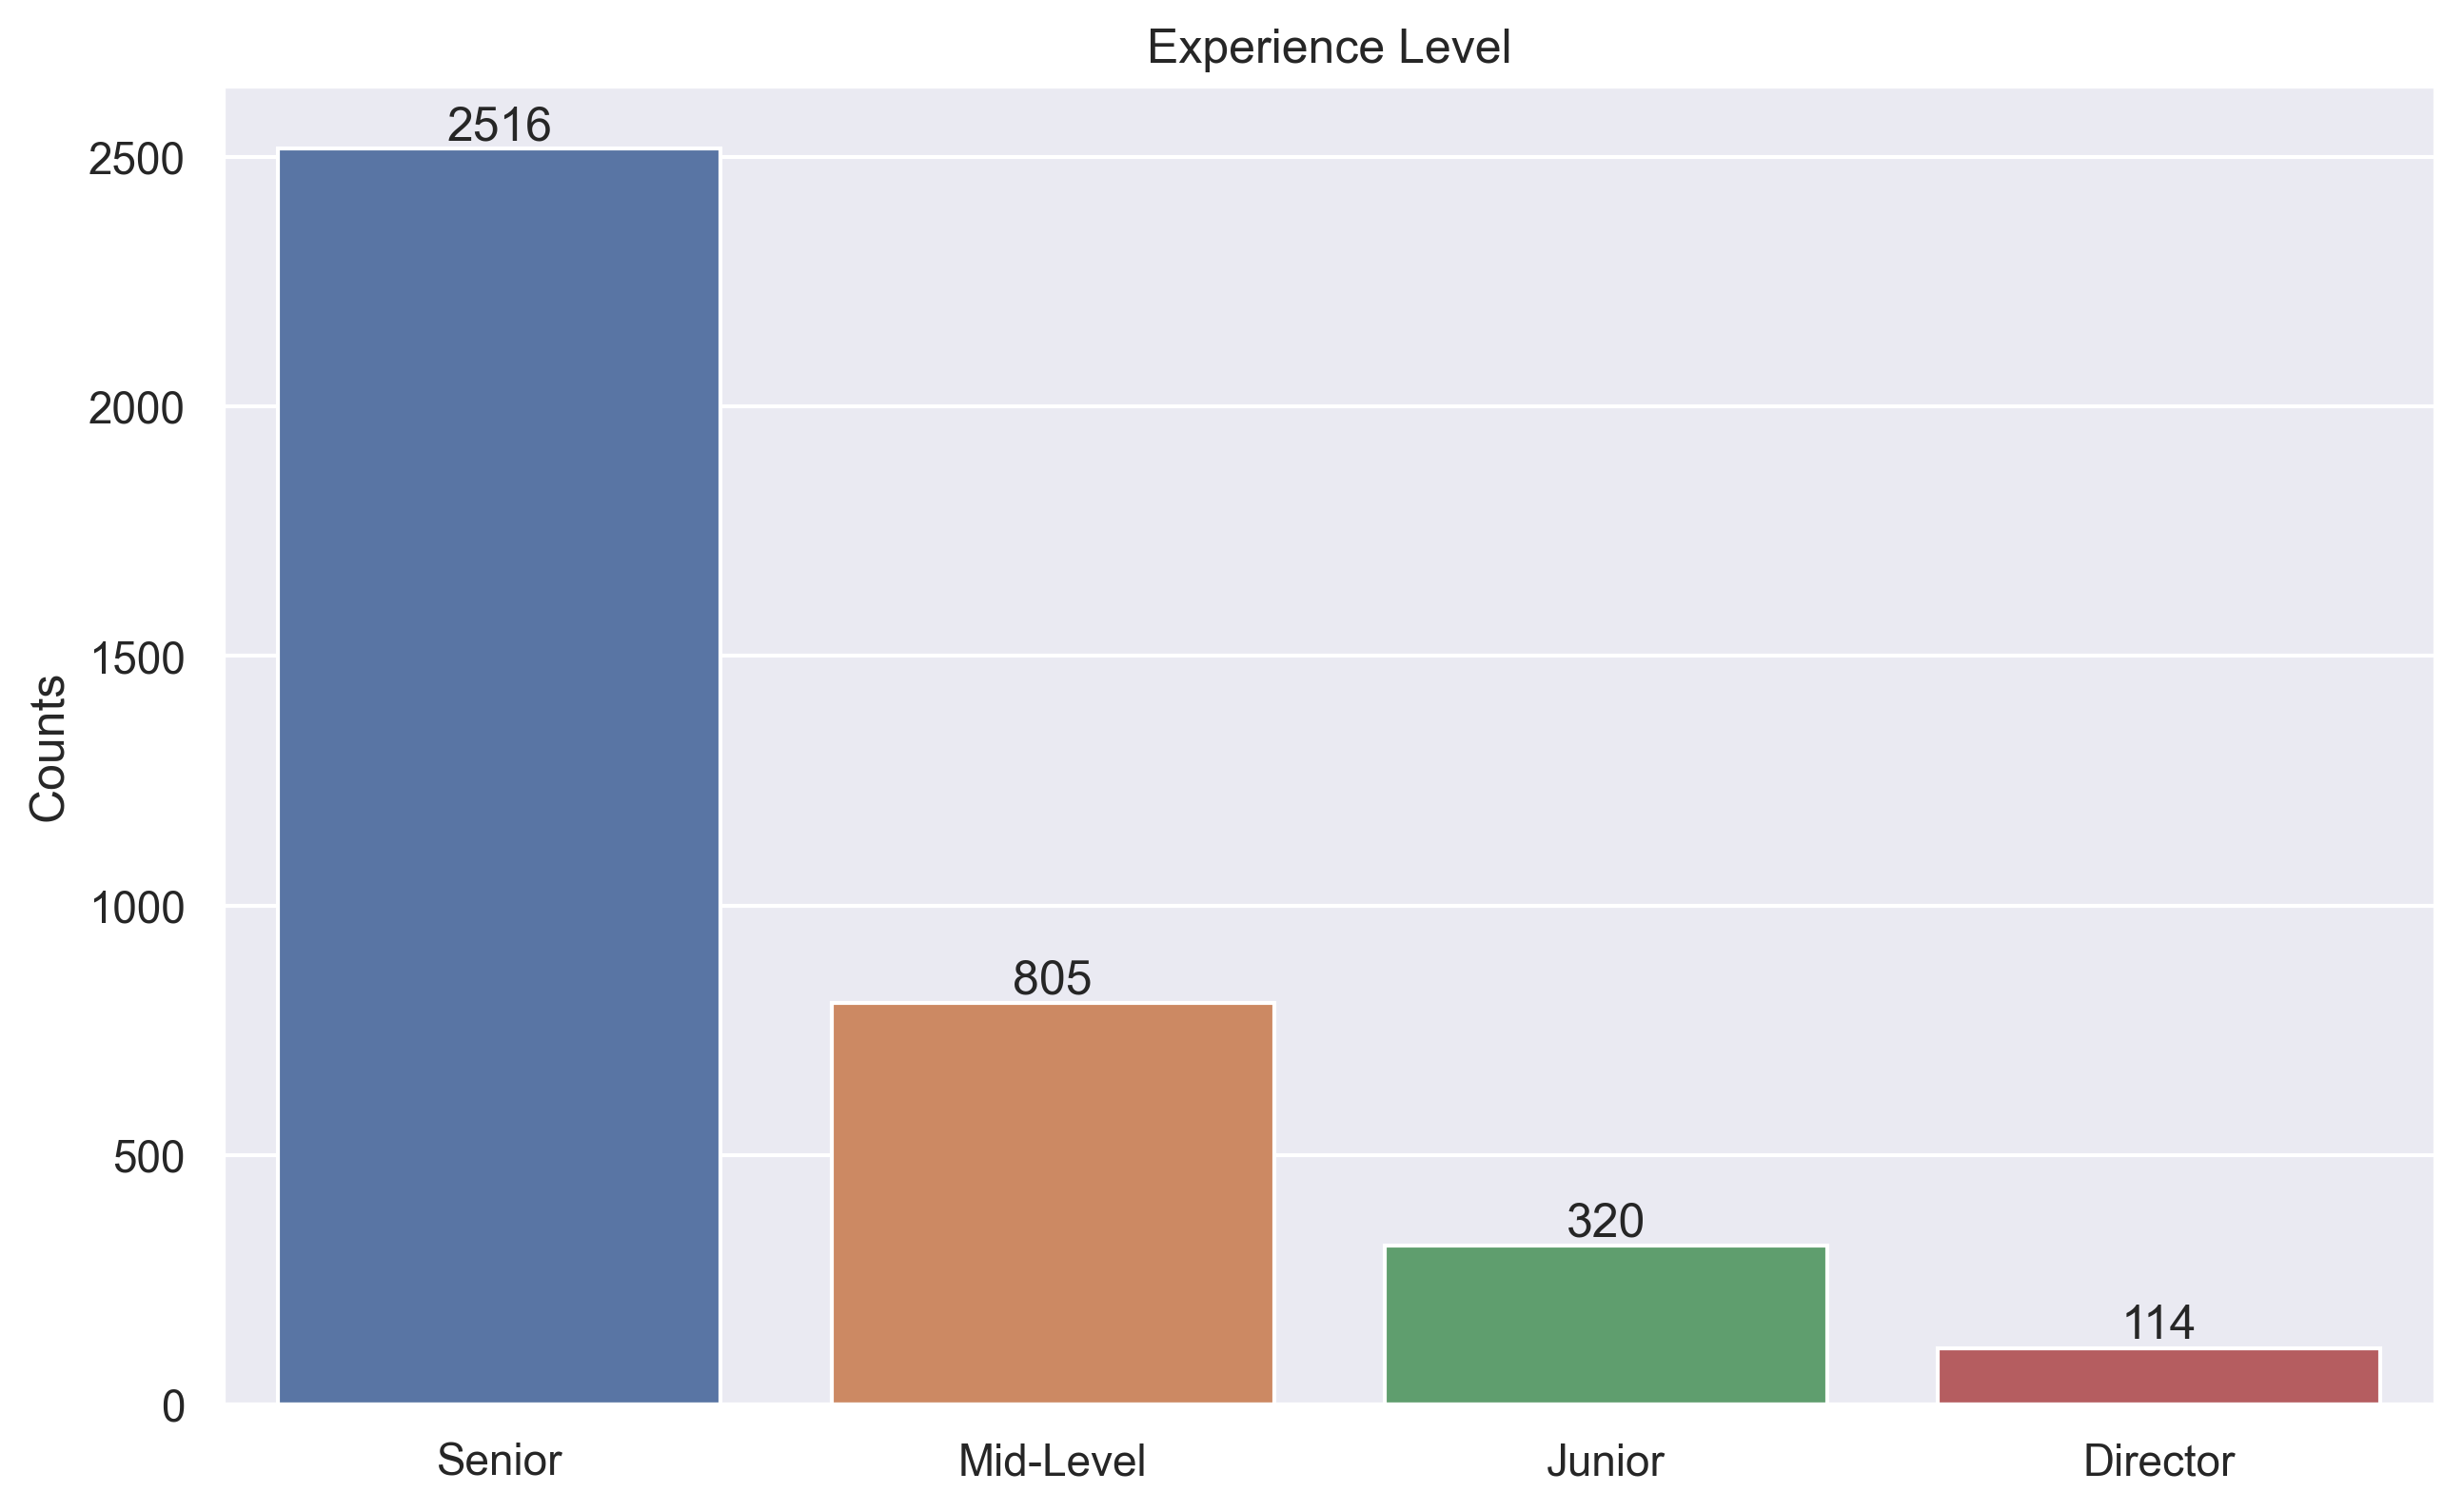

In [50]:
# Uzmanlık seviyelerinin sayısı
fig, ax = plt.subplots()
sns.countplot(ax=ax, data=df, x = df.experience_level)
ax.set(xlabel="", ylabel="Counts", title="Experience Level")
ax.bar_label(ax.containers[0]) # Burası 2516, 805 gibi sayıların yazabilmesi için 

İSTİHDAM TÜRLERİ

In [51]:
df["employment_type"].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [52]:
df["employment_type"] = df["employment_type"].replace("FT", "Full-Time") 
df["employment_type"] = df["employment_type"].replace("PT", "Part-Time") 
df["employment_type"] = df["employment_type"].replace("CT", "Contract") 
df["employment_type"] = df["employment_type"].replace("FL", "Freelance") 


[Text(0, 0, '113'), Text(0, 0, '1'), Text(0, 0, '0'), Text(0, 0, '0')]

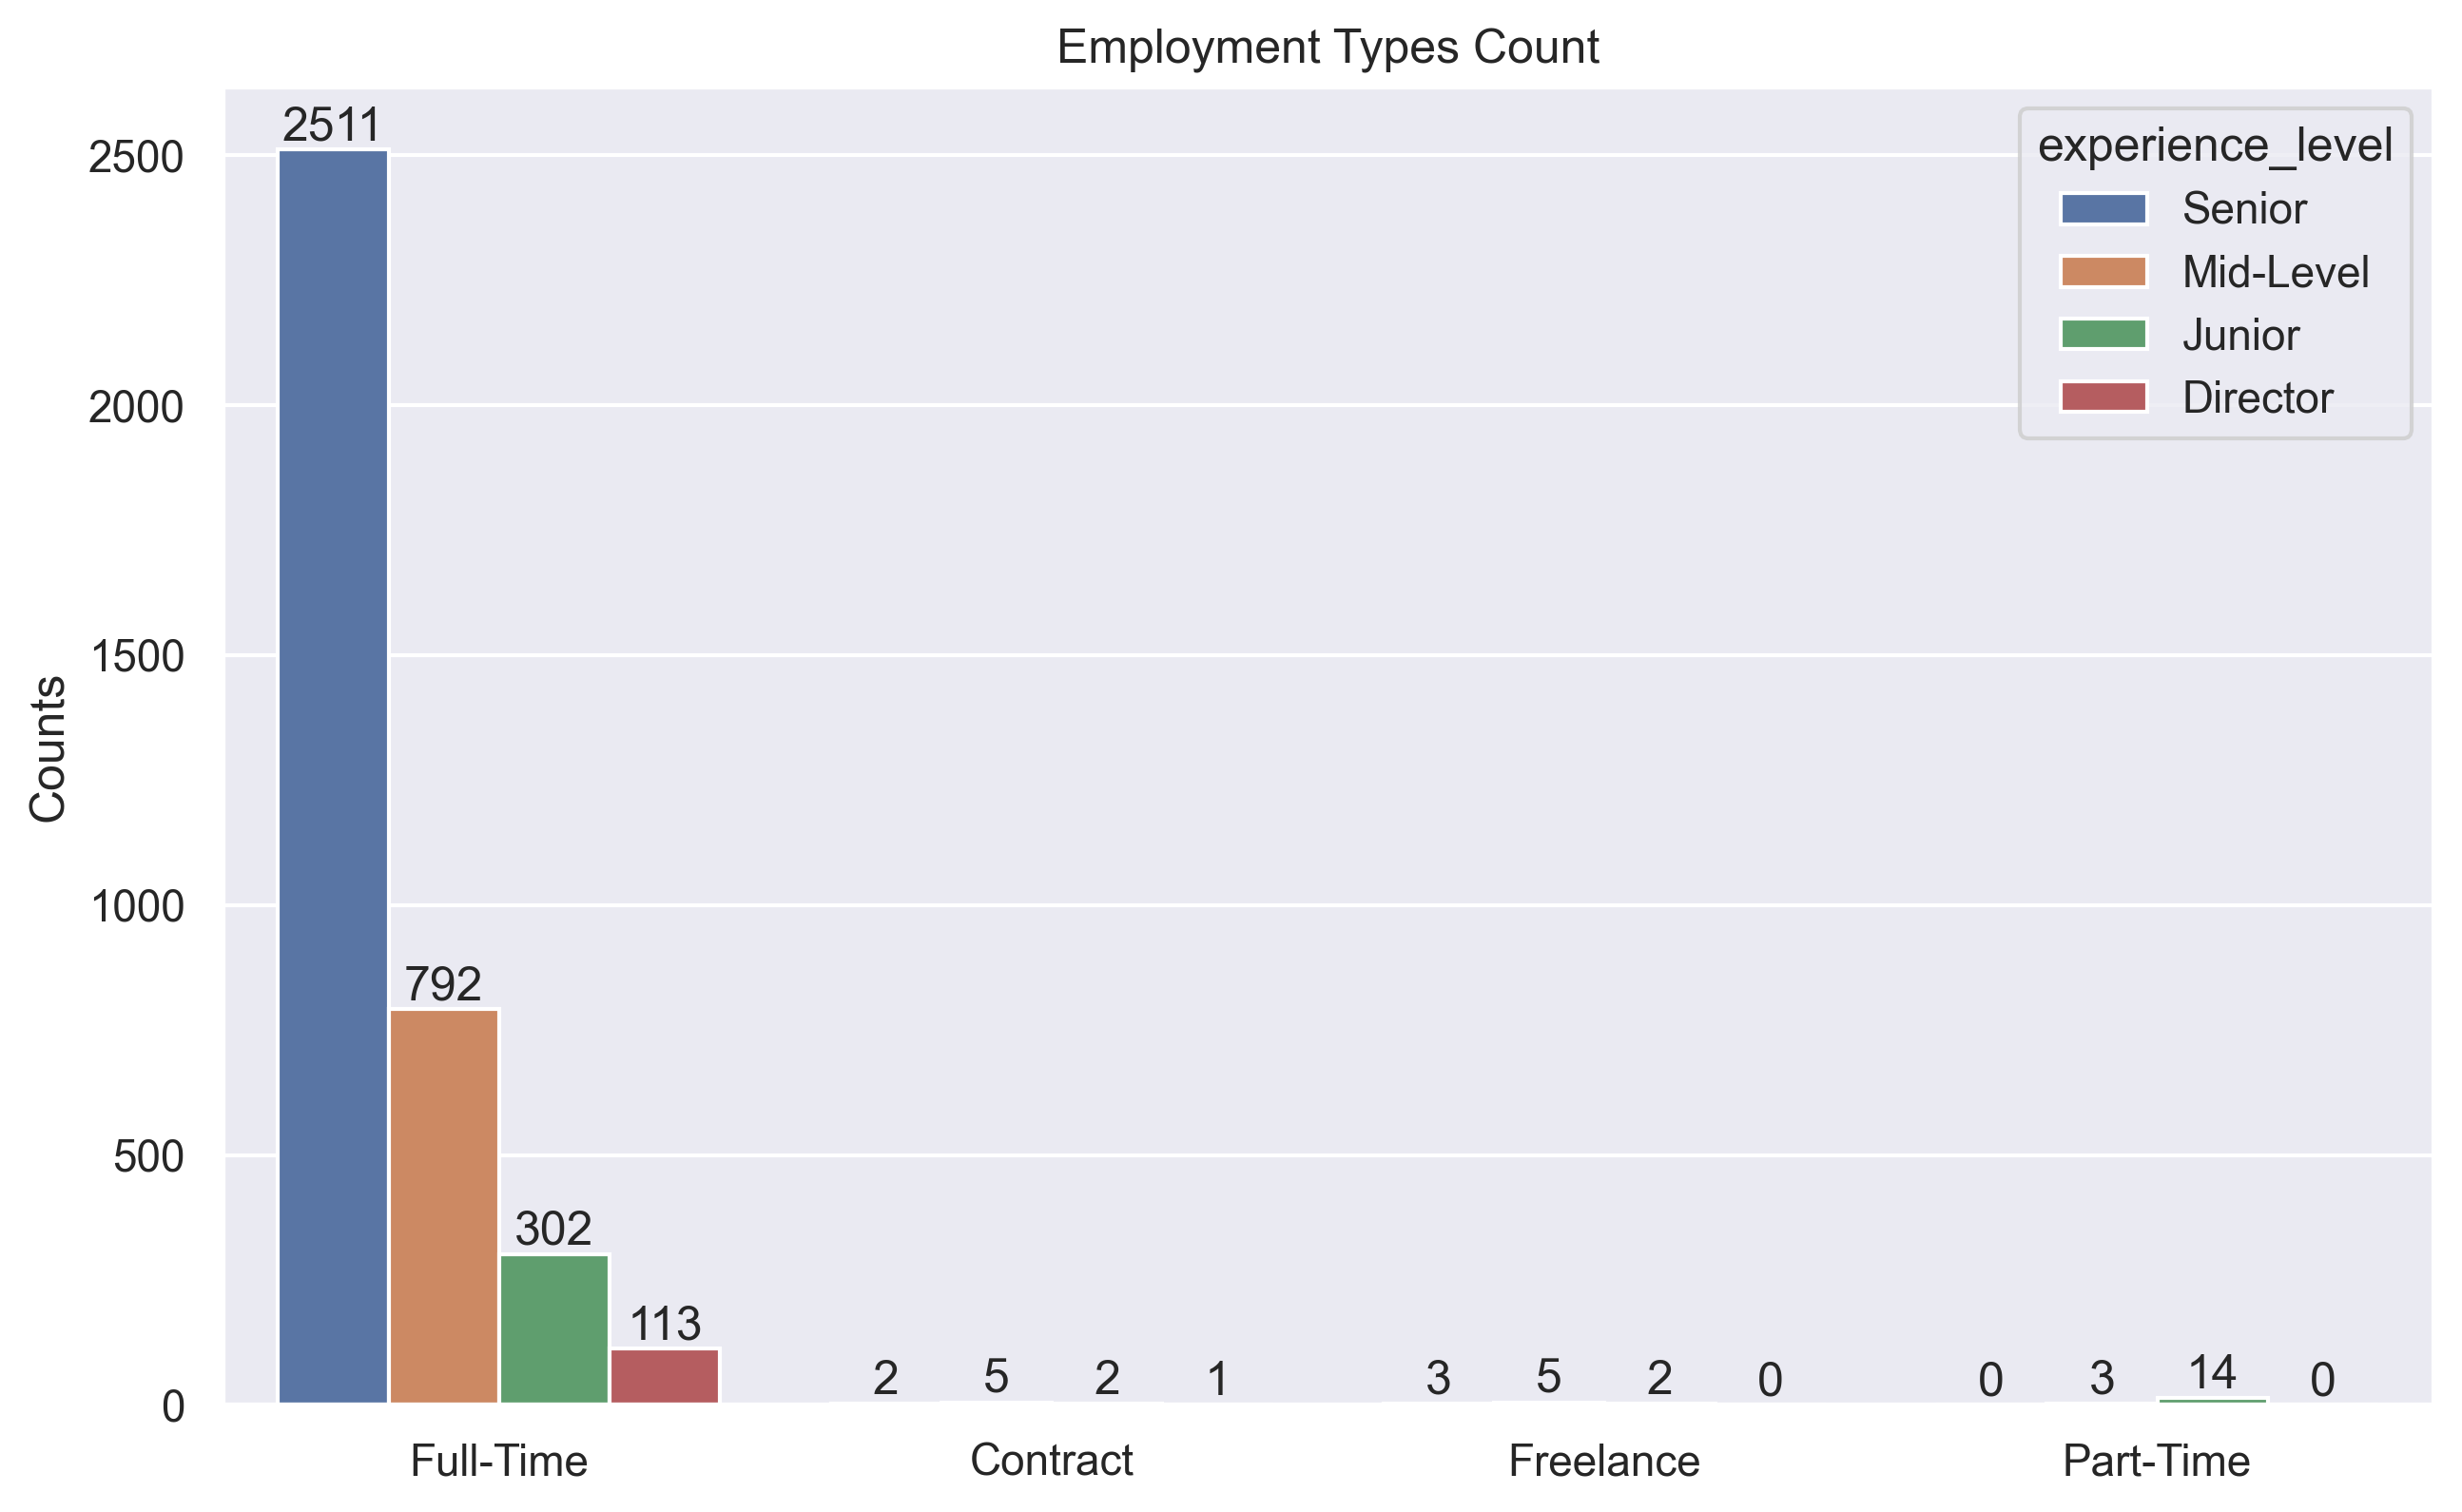

In [55]:
fig, ax = plt.subplots()
sns.countplot(data=df, ax=ax, x=df.employment_type, hue="experience_level")
ax.set(xlabel = "", ylabel="Counts", title="Employment Types Count")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

ORTALAMA MAAŞLAR

[Text(0, 2, '149367'),
 Text(0, 2, '27750'),
 Text(0, 2, '50000'),
 Text(0, 2, '17779')]

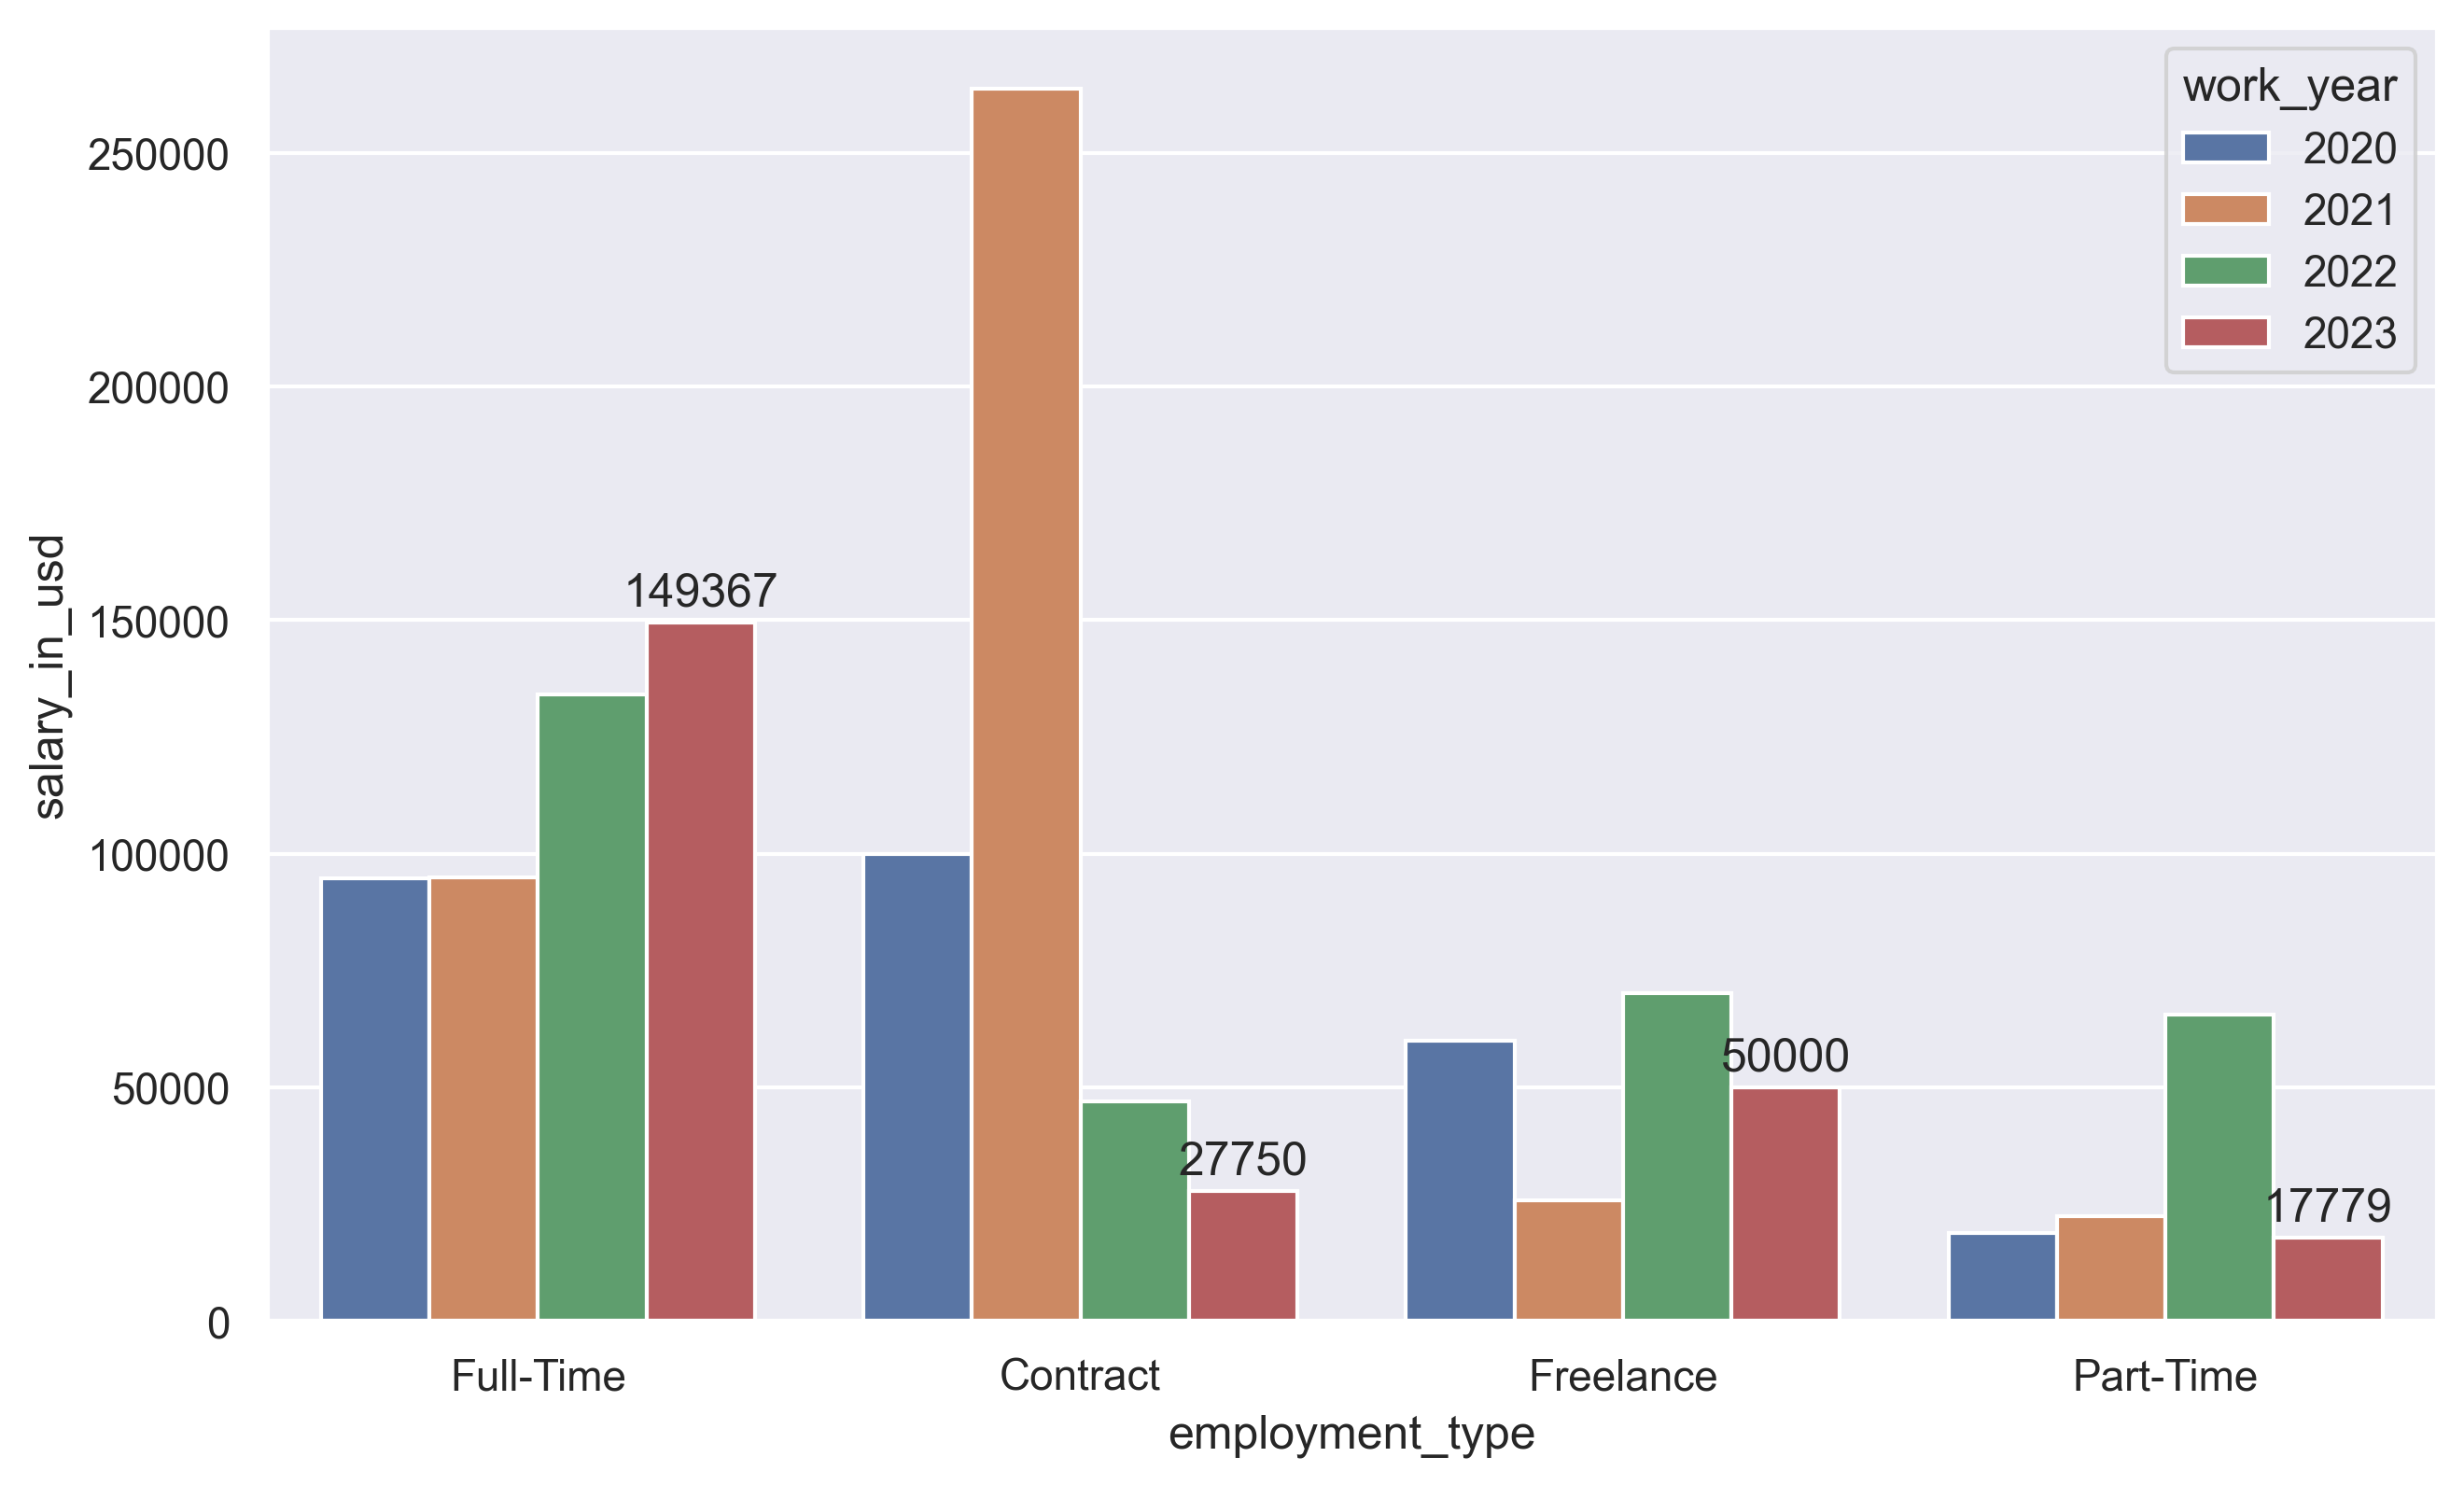

In [59]:
avg_salaries = df.groupby("employment_type")["salary_in_usd"].mean().round().sort_values(ascending=False)
fig, ax = plt.subplots()
sns.barplot(ax=ax, data=df, x = "employment_type", y="salary_in_usd",errorbar=None, hue="work_year")
ax.bar_label(ax.containers[3], padding=2)

<AxesSubplot: title={'center': 'Average Salaries Based on Work Year'}, xlabel='Work Year', ylabel='Salary'>

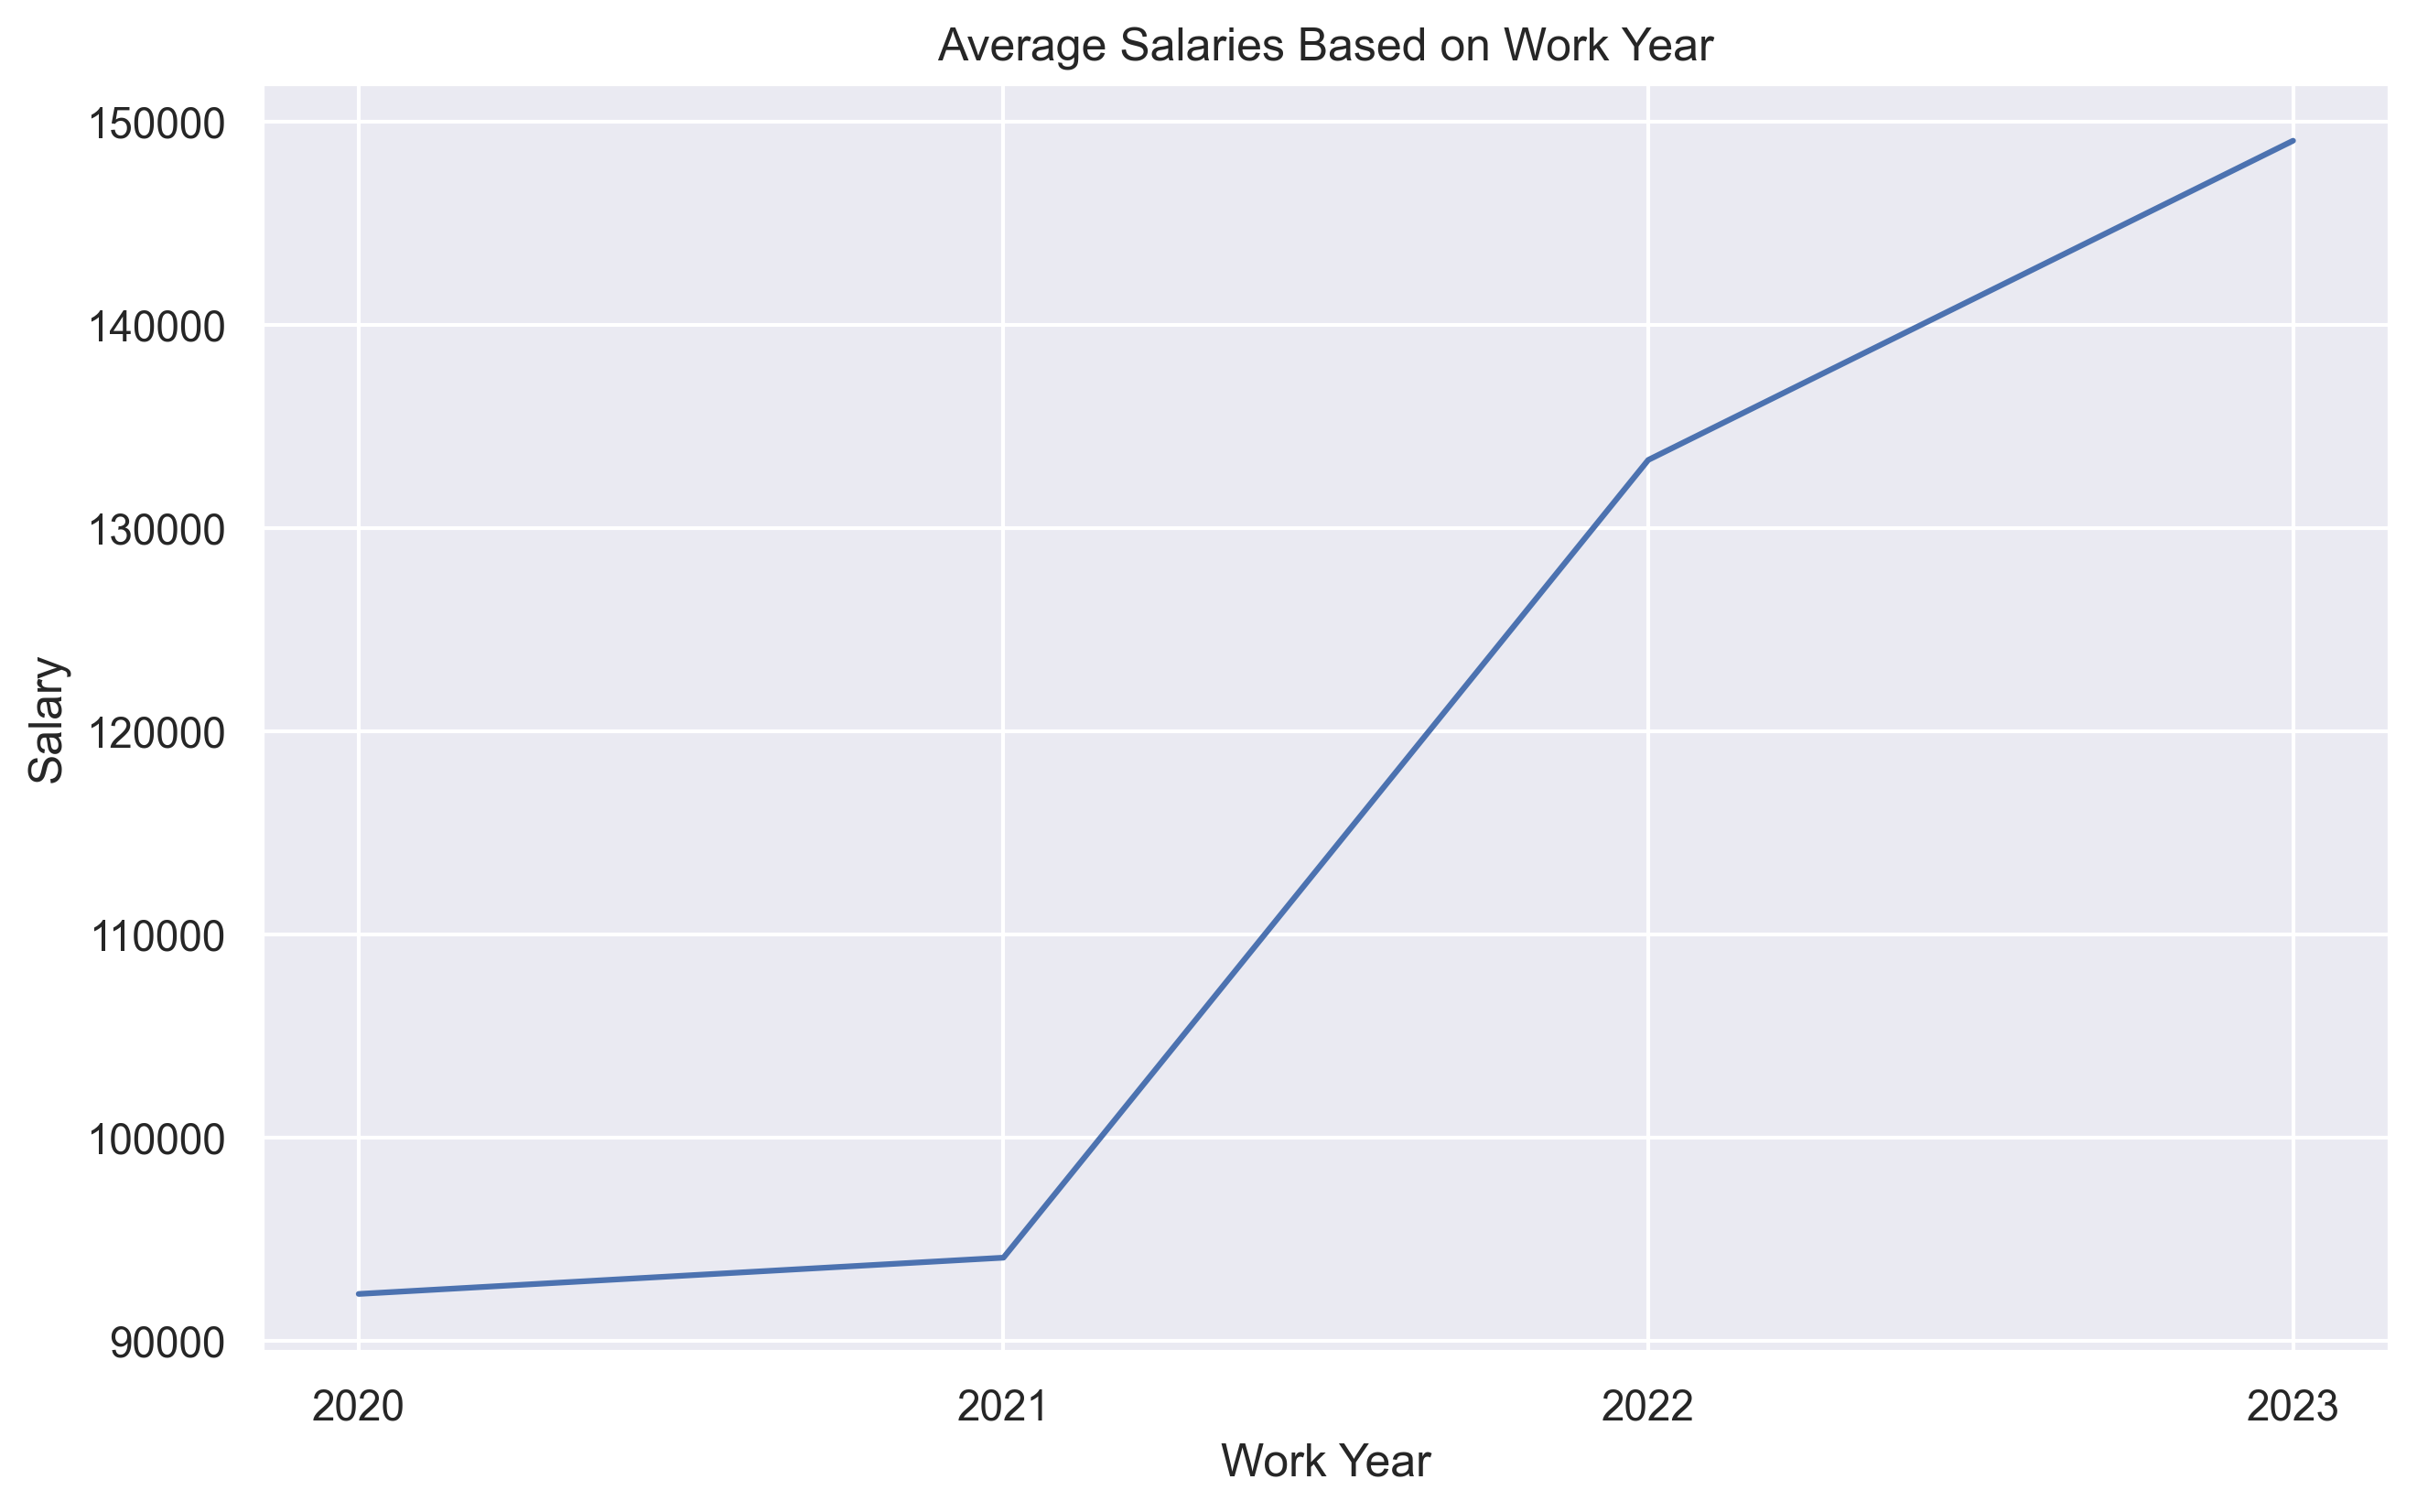

In [60]:
year_based_salary = df["salary_in_usd"].groupby(df["work_year"]).mean()
plt.title("Average Salaries Based on Work Year")
plt.xlabel("Work Year")
plt.ylabel("Salary")
sns.lineplot(x=["2020","2021", "2022", "2023"], y = year_based_salary)